In [1]:
import numpy as np
import pandas as pd
import csv
import itertools
import math
import matplotlib.pyplot as plt
import random
import decimal
import pathlib
import time
%matplotlib inline

from collections import Counter
from scipy import interpolate
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import rice
from scipy.stats import gumbel_r
from scipy.stats import genextreme
from scipy.stats import genpareto
from scipy.stats import kstest
from scipy.stats import ks_2samp
from math import pi
from matplotlib import pyplot
from matplotlib.pyplot import figure
from math import pi
from numpy import nan
from sklearn.linear_model import LinearRegression


path = r'C:\Data\Data18\New\t20190205034059_00000'
# path = r'C:\Data\Data19\New\2019-00000'
# path = r'C:\Data\Data20\New\20210107203420_00000'

# SITES = ['0217334']

SITES = ['0217334', '1850227']
# SITES = ['0470114', '150276', '0210378', '0810347', '1850227'] ## Route I75
# SITES = ['1430126', '2170218', '2450214'] ## Route I20
# SITES = ['217334', '1750247'] ## Route I16

spans = np.linspace(30, 60, 1)  #(30,180,6)
years = [1]#, 2, 10, 75]

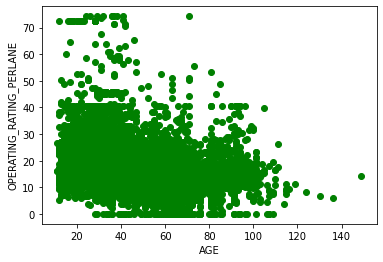

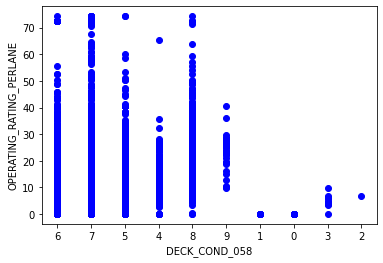

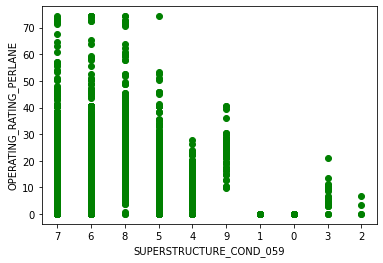

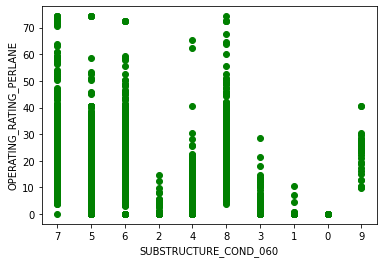

Intercept: [10.81264416]
Coefficients:  [[-0.11115389  0.17545757  1.83732512]]
Residual sum of squares: 81.34
Variance score: 0.15


C:\Users\17062\Anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [2]:
nbi = pd.read_csv(r'C:\Data\NBI\GA_2010.csv', 
                  usecols = ['STRUCTURE_NUMBER_008', 'TRAFFIC_LANES_ON_028A', 'ROUTE_NUMBER_005D',
                             'YEAR_BUILT_027','DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060',
                             'OPERATING_RATING_064', 'INVENTORY_RATING_066', 'STRUCTURAL_EVAL_067'],
                      dtype = str, keep_default_na=False, skip_blank_lines=True)
nbi = nbi.loc[(nbi['DECK_COND_058'] != "N") & (nbi['SUPERSTRUCTURE_COND_059'] != "N") 
            & (nbi['SUBSTRUCTURE_COND_060'] != "N")].copy()
# nbi = nbi.loc[(nbi['ROUTE_NUMBER_005D'] == '75')].copy()
nbi = nbi.replace(r'^\s*$', np.nan, regex=True)
nbi.loc[nbi['TRAFFIC_LANES_ON_028A'] == '1', 'OPERATING_RATING_PERLANE'] = nbi['OPERATING_RATING_064'].astype(float)/1.2
nbi.loc[nbi['TRAFFIC_LANES_ON_028A'] == '2', 'OPERATING_RATING_PERLANE'] = nbi['OPERATING_RATING_064'].astype(float)/2.2
nbi.loc[nbi['TRAFFIC_LANES_ON_028A'] == '3', 'OPERATING_RATING_PERLANE'] = nbi['OPERATING_RATING_064'].astype(float)/3.05
nbi.loc[nbi['TRAFFIC_LANES_ON_028A'] == '4', 'OPERATING_RATING_PERLANE'] = nbi['OPERATING_RATING_064'].astype(float)/3.7
nbi.loc[nbi['TRAFFIC_LANES_ON_028A'] == '5', 'OPERATING_RATING_PERLANE'] = nbi['OPERATING_RATING_064'].astype(float)/4.4
nbi.loc[nbi['TRAFFIC_LANES_ON_028A'] == '6', 'OPERATING_RATING_PERLANE'] = nbi['OPERATING_RATING_064'].astype(float)/5.05
nbi.loc[nbi['TRAFFIC_LANES_ON_028A'] == '7', 'OPERATING_RATING_PERLANE'] = nbi['OPERATING_RATING_064'].astype(float)/5.70
nbi.loc[nbi['TRAFFIC_LANES_ON_028A'] == '8', 'OPERATING_RATING_PERLANE'] = nbi['OPERATING_RATING_064'].astype(float)/6.35
nbi.loc[nbi['TRAFFIC_LANES_ON_028A'] == '9', 'OPERATING_RATING_PERLANE'] = nbi['OPERATING_RATING_064'].astype(float)/7.00
nbi.loc[nbi['TRAFFIC_LANES_ON_028A'] == '10', 'OPERATING_RATING_PERLANE'] = nbi['OPERATING_RATING_064'].astype(float)/7.65

# with pd.option_context('mode.use_inf_as_null', True):
nbi = nbi.dropna()
nbi['AGE'] = 2021 - nbi['YEAR_BUILT_027'].astype(float)
# nbi.head()
cdf = nbi[['AGE','DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060', 'OPERATING_RATING_PERLANE']]

cdf.head(9)

plt.scatter(cdf.AGE, cdf.OPERATING_RATING_PERLANE,  color='g')
# plt.scatter(np.log10(cdf['AGE']), np.log10(cdf['OPERATING_RATING_PERLANE']),  color='g')
plt.xlabel("AGE")
plt.ylabel("OPERATING_RATING_PERLANE")
plt.show()


plt.scatter(cdf.DECK_COND_058, cdf.OPERATING_RATING_PERLANE,  color='blue')
# plt.scatter(np.log10(cdf['DECK_COND_058']), cdf.OPERATING_RATING_PERLANE,  color='blue')
plt.xlabel("DECK_COND_058")
plt.ylabel("OPERATING_RATING_PERLANE")
plt.show()

plt.scatter(cdf.SUPERSTRUCTURE_COND_059, cdf.OPERATING_RATING_PERLANE,  color='g')
plt.xlabel("SUPERSTRUCTURE_COND_059")
plt.ylabel("OPERATING_RATING_PERLANE")
plt.show()

plt.scatter(cdf.SUBSTRUCTURE_COND_060, cdf.OPERATING_RATING_PERLANE,  color='g')
plt.xlabel("SUBSTRUCTURE_COND_060")
plt.ylabel("OPERATING_RATING_PERLANE")
plt.show()

msk = np.random.rand(len(nbi)) < 0.8

train = cdf[msk]
test = cdf[~msk]

from sklearn import linear_model
regr = linear_model.LinearRegression()
# print(train)


In [ ]:
column_names = ["i", "Intercept", "coef", "Var_score"]
lin_r = pd.DataFrame(columns = column_names)
for ii in range(0, 100, 1): 
    msk = np.random.rand(len(cdf)) < 0.8

    train = cdf[msk]
    test = cdf[~msk]

    from sklearn import linear_model
    regr = linear_model.LinearRegression()
    
    X = np.asanyarray(train[['AGE', 'SUBSTRUCTURE_COND_060', 'WORK_DONE_BY_075B']])
    Y = np.asanyarray(train[['OPERATING_RATING_PERLANE']])
    # 
    regr.fit(X, Y)
    # The intercept
    intercept = regr.intercept_
#     print('Intercept:', intercept)
    
    # The coefficients
    slope = regr.coef_
#     print ('Coefficients: ', slope)

    y_hat= regr.predict(test[['AGE', 'SUBSTRUCTURE_COND_060', 'WORK_DONE_BY_075B']])
    x = np.asanyarray(test[['AGE', 'SUBSTRUCTURE_COND_060', 'WORK_DONE_BY_075B']])
    y = np.asanyarray(test[['OPERATING_RATING_PERLANE']]).astype(float)
#     print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))
#     Explained variance score: 1 is perfect prediction
#     print('Variance (R2) score: %.2f' % regr.score(x, y))
    lin_r.loc[ii] = [str(ii), str(intercept), str(slope), str(regr.score(x, y))]

print(lin_r[lin_r['Var_score'] == lin_r['Var_score'].max()])